# Calculating emps in ANHA4-EXH001

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
ptrc_obj = nc.Dataset('_data\EXP14_1h_20100101_20100101_ptrc_T.nc')
Ba=ptrc_obj.variables['Ba'][:]
#d18O=ptrc_obj.variables['d18O'][:]
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

# emps calculations

In [4]:
ANHA4_obj = nc.Dataset('_data\ANHA4-EXH001_icemod_y2014m08d13.nc')
safl=ANHA4_obj.variables['iocesafl'][:]
salin=ANHA4_obj.variables['isssalin'][:]
nav_lat=ANHA4_obj.variables['nav_lat'][:]
nav_lon=ANHA4_obj.variables['nav_lon'][:]

## iocesafl

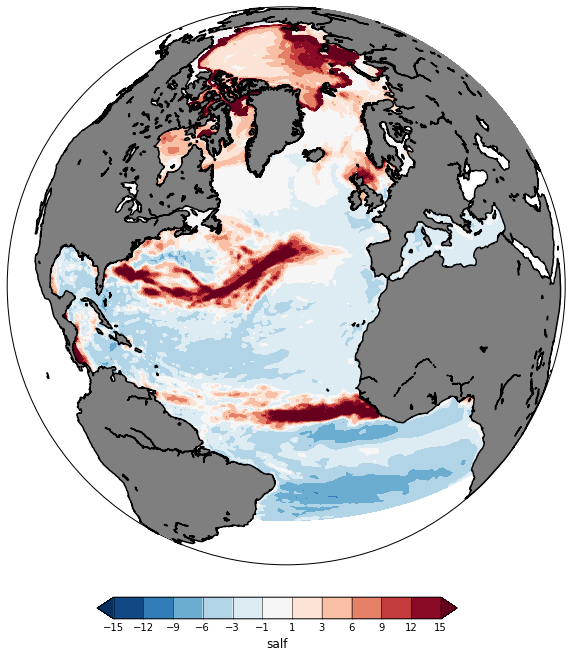

In [5]:
lev = [-15, -12, -9, -6, -3, -1, 1, 3, 6, 9, 12, 15]
fig=plt.figure(figsize=(10, 10))
ax = fig.gca()
proj=Basemap(projection='ortho',lon_0=-32.5, lat_0=37.5, resolution='l') # http://matplotlib.org/basemap/users/omerc.html
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, safl[0, :, :], lev, cmap=plt.cm.RdBu_r, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('salf', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

## isssalin

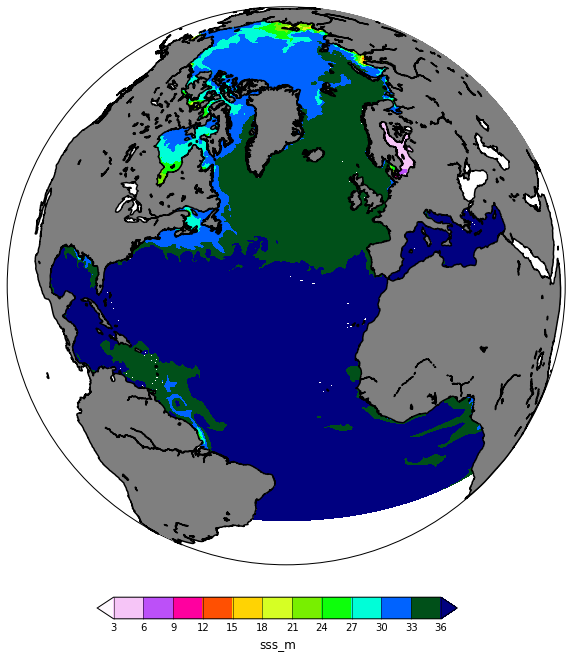

In [6]:
lev = np.arange(3, 38, 3)
fig=plt.figure(figsize=(10, 10))
ax = fig.gca()
proj=Basemap(projection='ortho',lon_0=-32.5, lat_0=37.5, resolution='l') # http://matplotlib.org/basemap/users/omerc.html
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, salin[0, :, :], lev, cmap=plt.cm.gist_ncar_r, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('sss_m', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

In [7]:
emps=-1.0*safl[0, :, :]*34.7/(3600.0*4*(salin[0, :, :]+1.0e-16))

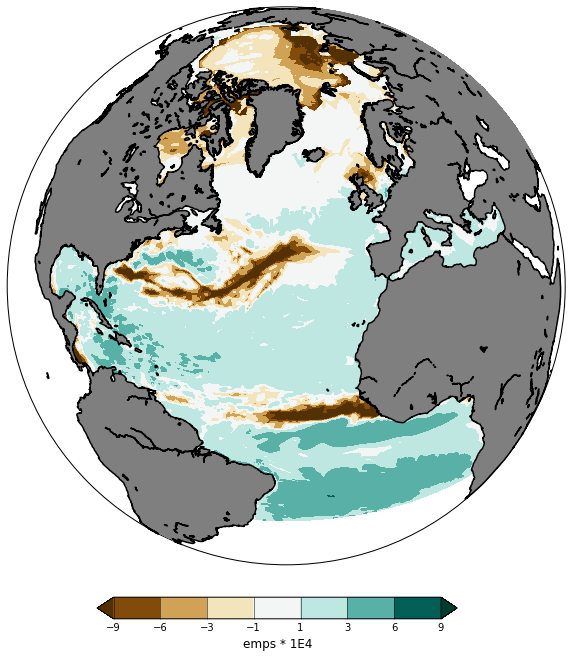

In [8]:
lev = np.array([-9, -6, -3, -1, 1, 3, 6, 9])
fig=plt.figure(figsize=(10, 10))
ax = fig.gca()
proj=Basemap(projection='ortho',lon_0=-32.5, lat_0=37.5, resolution='l') # http://matplotlib.org/basemap/users/omerc.html
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, emps*1e4, lev, cmap=plt.cm.BrBG, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('emps * 1E4', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

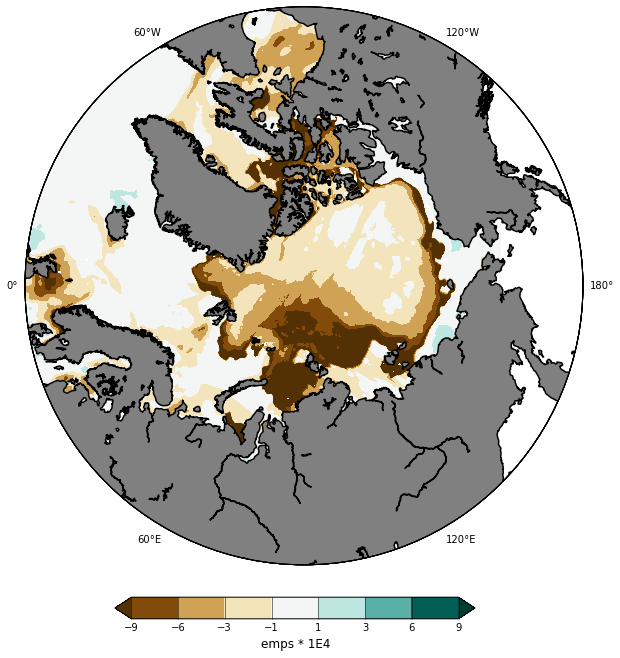

In [20]:
fig=plt.figure(figsize=(10, 10)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')

x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, emps*1e4, lev, cmap=plt.cm.BrBG, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('emps * 1E4', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

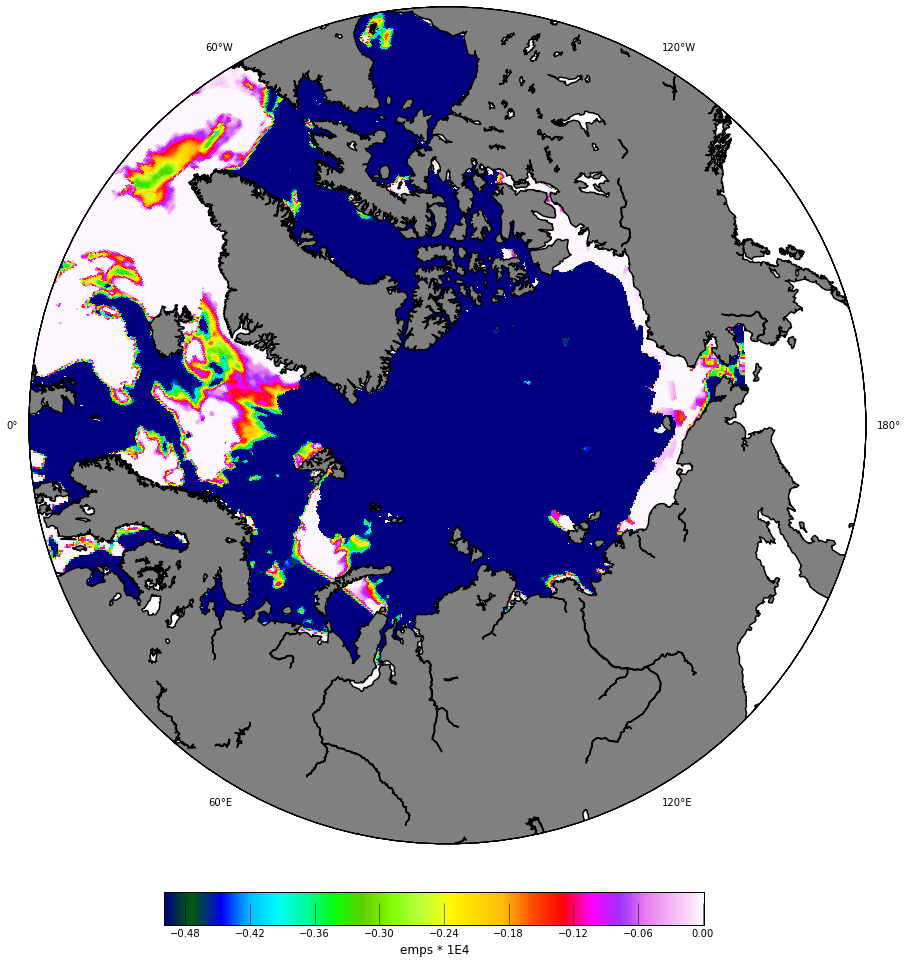

In [24]:
fig=plt.figure(figsize=(15, 15)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
#CS=proj.contourf(x, y, emps*1e4, lev, cmap=plt.cm.BrBG, extend='both')
CS = proj.pcolor(x, y, emps*1e4, vmin=-0.5, vmax=0.001, cmap=plt.cm.gist_ncar)
cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('emps * 1E4', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
#CBar.set_ticks(lev)

In [26]:
emps.shape

(800L, 544L)

In [27]:
def zoomin_ortho_rf(nav_lon, nav_lat, rf, ax, cmap=plt.cm.nipy_spectral_r, zoom_in_param=[70, -120, 0.125, 0.05]):
    center_lat = zoom_in_param[0]
    center_lon = zoom_in_param[1]
    coefx = zoom_in_param[2]; coefy = zoom_in_param[3]
    ref_map=Basemap(projection='ortho',\
                lat_0=center_lat, lon_0=center_lon, resolution=None)
    width=(ref_map.urcrnrx-ref_map.llcrnrx)*coefx  
    height=(ref_map.urcrnry-ref_map.llcrnry)*coefy 

    proj=Basemap(projection='ortho',\
            lat_0=center_lat, lon_0=center_lon, resolution='i',\
            llcrnrx=-0.5*width, llcrnry=-0.5*height, \
            urcrnrx=0.5*width, urcrnry=0.5*height, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 15), labels=[0, 0, 0, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.0, linestyle='-', color='k')
    x, y=proj(nav_lon, nav_lat)
    CS = proj.pcolor(x, y, rf, vmin=-0.5, vmax=0.001, cmap=plt.cm.gist_ncar)
    return CS

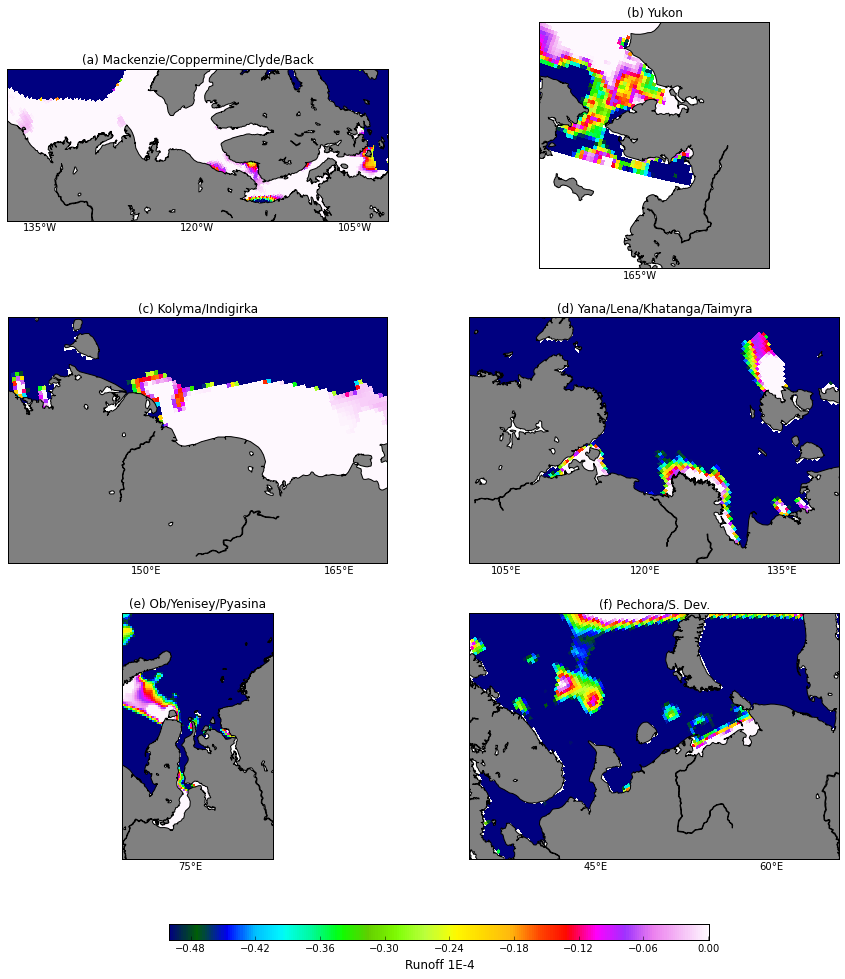

In [28]:
fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((3, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((3, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((3, 2), (1, 1), colspan=1, rowspan=1)
ax5 = plt.subplot2grid((3, 2), (2, 0), colspan=1, rowspan=1)
ax6 = plt.subplot2grid((3, 2), (2, 1), colspan=1, rowspan=1)

CS = zoomin_ortho_rf(nav_lon, nav_lat, emps*1e4, ax=ax1, zoom_in_param=[70, -120, 0.125, 0.05])
ax1.set_title('(a) Mackenzie/Coppermine/Clyde/Back')
zoomin_ortho_rf(nav_lon, nav_lat, emps*1e4, ax=ax2, zoom_in_param=[65, -164, 0.07, 0.075])
ax2.set_title('(b) Yukon')
zoomin_ortho_rf(nav_lon, nav_lat, emps*1e4, ax=ax3, zoom_in_param=[71, 154, 0.1, 0.065])
ax3.set_title('(c) Kolyma/Indigirka')
zoomin_ortho_rf(nav_lon, nav_lat, emps*1e4, ax=ax4, zoom_in_param=[75, 121, 0.12, 0.08])
ax4.set_title('(d) Yana/Lena/Khatanga/Taimyra')
zoomin_ortho_rf(nav_lon, nav_lat, emps*1e4, ax=ax5, zoom_in_param=[72, 76, 0.08, 0.13])
ax5.set_title('(e) Ob/Yenisey/Pyasina')
zoomin_ortho_rf(nav_lon, nav_lat, emps*1e4, ax=ax6, zoom_in_param=[69, 50, 0.12, 0.08])
ax6.set_title('(f) Pechora/S. Dev.')

cax  = fig.add_axes([0.275, 0.05, 0.5, 0.015])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Runoff 1E-4', fontsize=12)